
Generate a figure showing motor velocity for different policies.

Nb: To generate this figure, you require the raw data files (which are quite large) in the benchmarking folder.


In [1]:

import os
import numpy as np
import seaborn as sns
import scipy.io as sio
from matplotlib import pyplot as plt

# Retrieve data
# mat_random = sio.loadmat(os.path.join('benchmarks', 'observations3_random_normalized.mat'))
# data_random = mat_random['observations']

mat_learning = sio.loadmat(os.path.join('benchmarks', 'observations4_move_in_direction_normalized.mat'))
data_learning = mat_learning['observations']

mat_failed = sio.loadmat(os.path.join('benchmarks', 'observations6_move_in_direction_failed_normalized.mat'))
data_failed = mat_failed['observations']

# Keep the same number of points
#N_random = len(data_random)
N_learning = len(data_learning)
N_failed = len(data_failed)

N_min = min([
    #N_random,
    N_learning,
    N_failed
])
#data_random = data_random[:N_min]
data_learning = data_learning[:N_min]
data_failed = data_failed[:N_min]


In [2]:

sns.set()


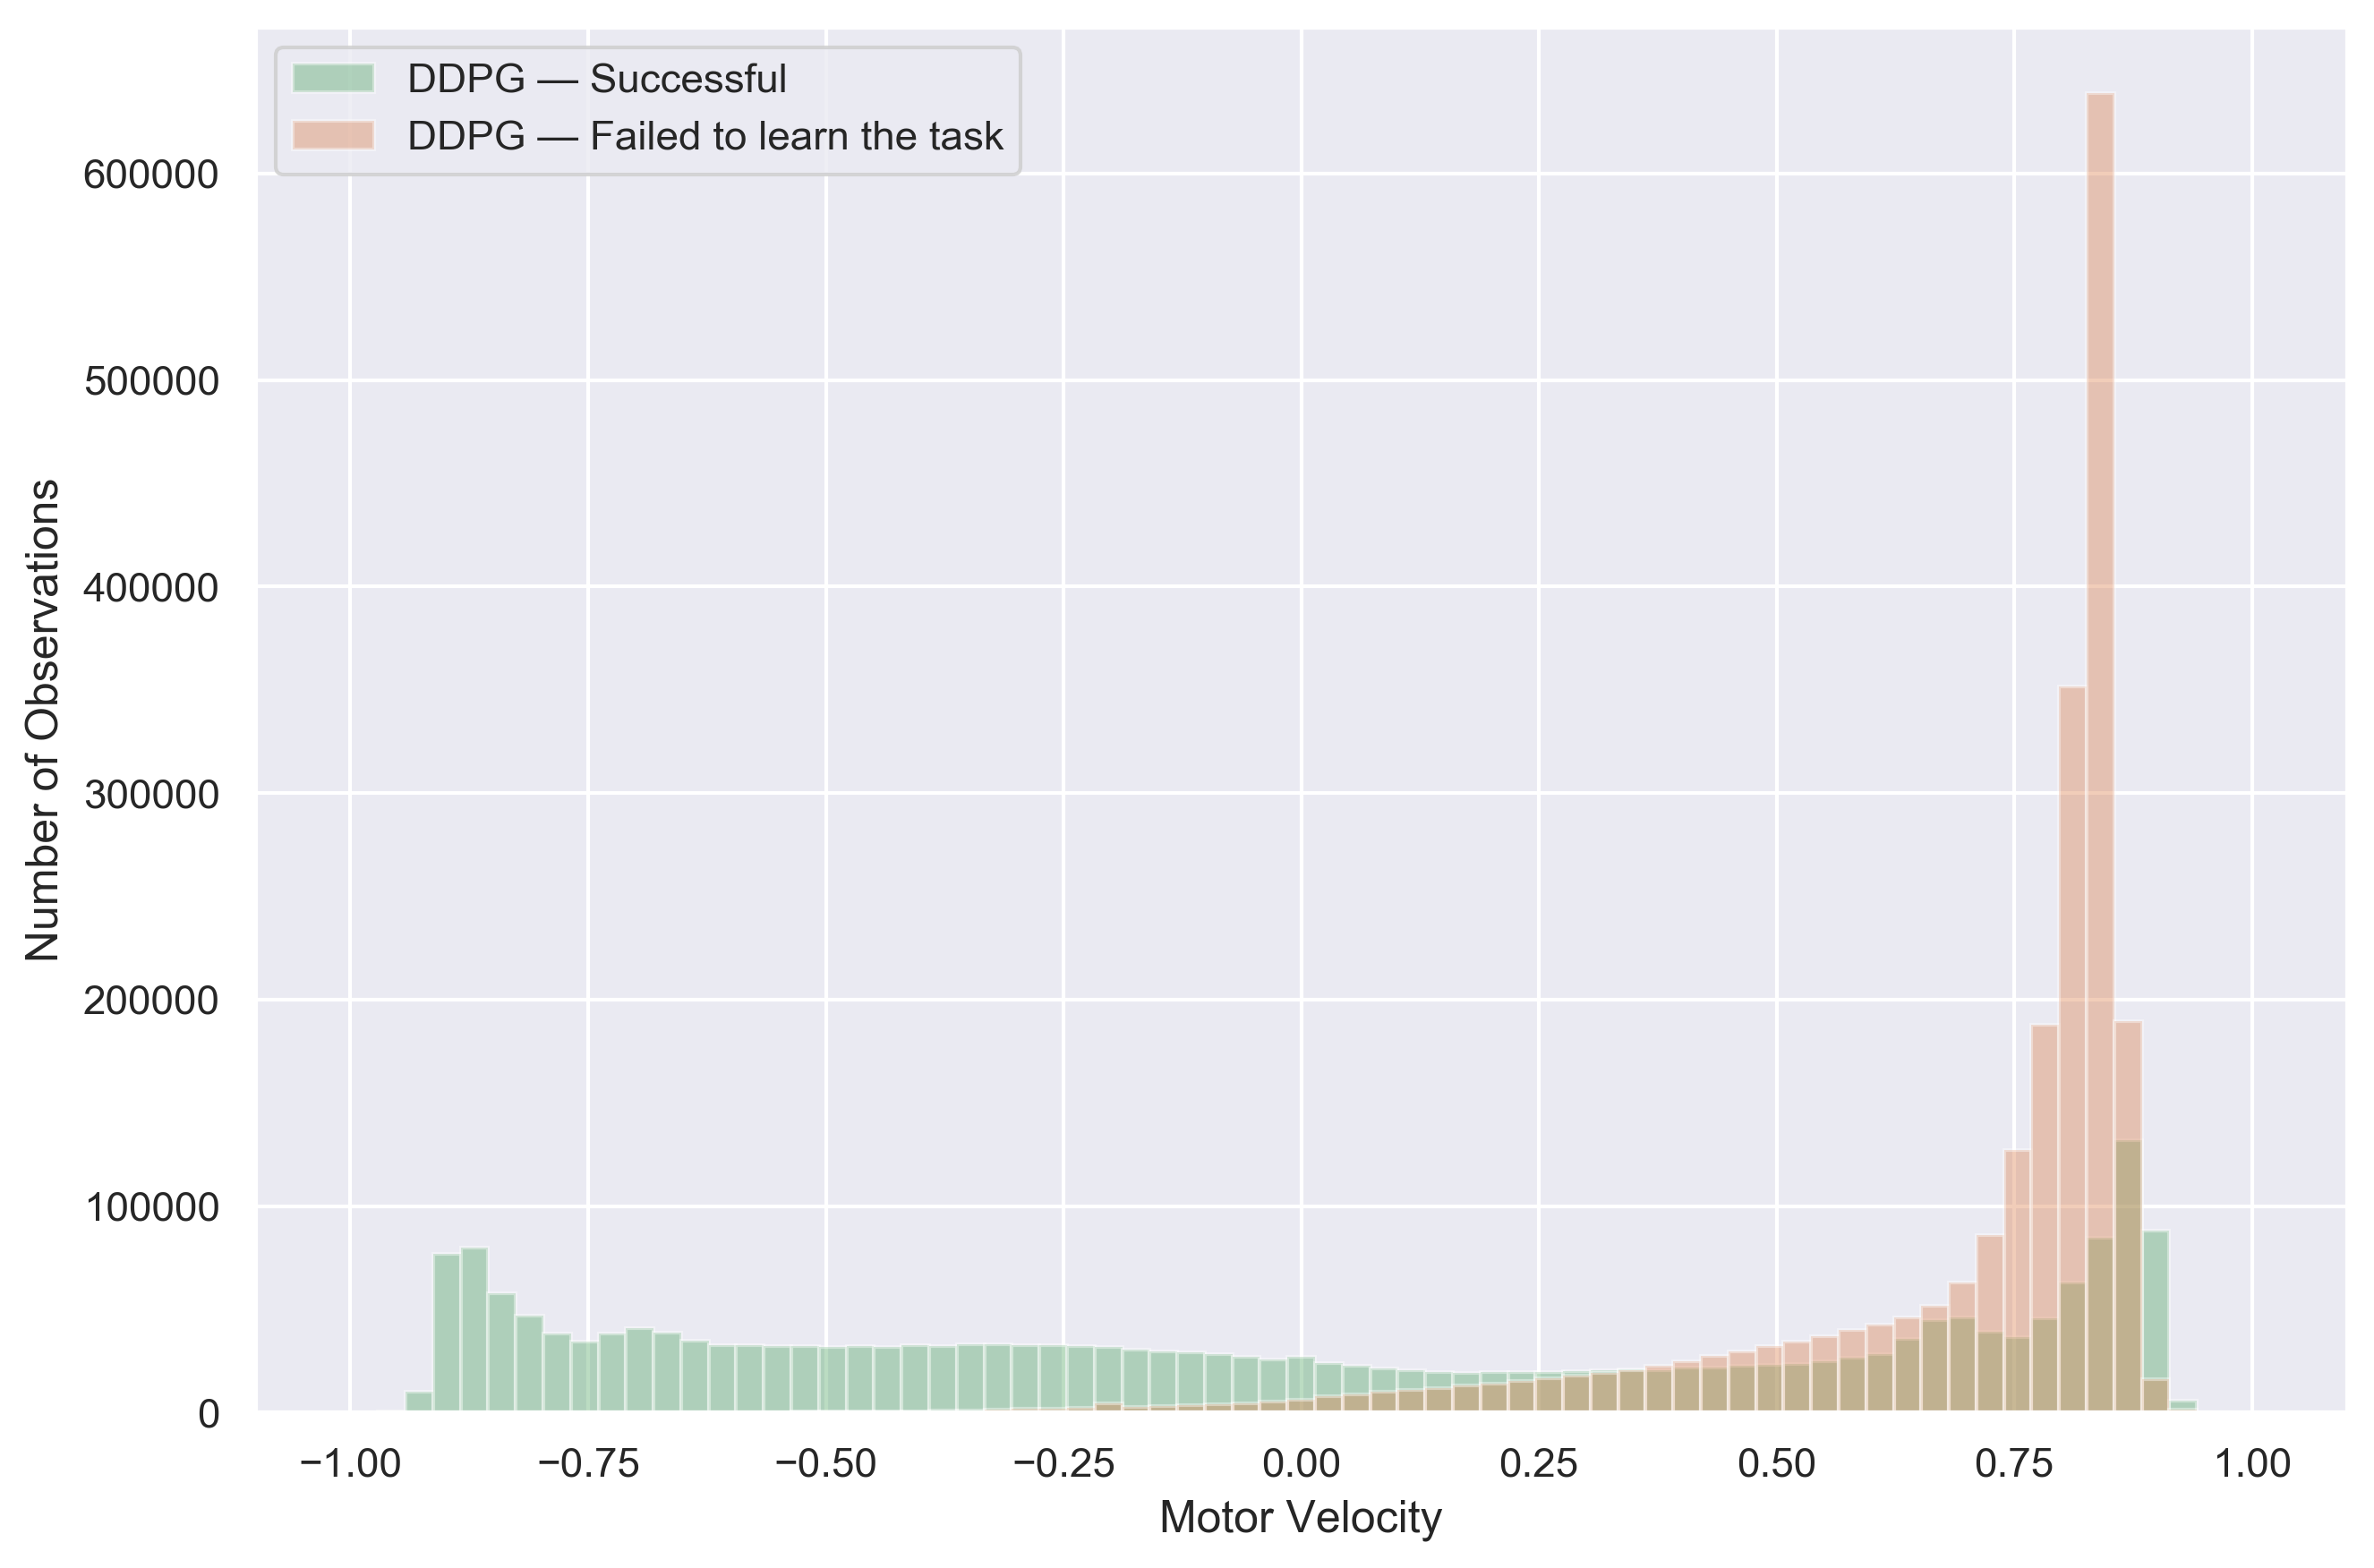

In [3]:

plt.figure(
    figsize=(9, 6),
    dpi=300
)

kwargs = dict(
    bins=np.linspace(-1.0, 1.0, 70),
    kde=False,
    hist=True
)

# sns.distplot(data_random.transpose()[14],
#     label="Random Policy",
#     **kwargs,
#     color='b',
# )

sns.distplot(
    data_learning.transpose()[14],
    label="DDPG — Successful",
    **kwargs,
    color='C2',
)

sns.distplot(
    data_failed.transpose()[14],
    label="DDPG — Failed to learn the task",
    **kwargs,
    color='C1',
)

plt.xlabel("Motor Velocity")
plt.ylabel("Number of Observations")
plt.legend()
plt.tight_layout()
plt.savefig(
    os.path.join("manuscript", "figures", "fig-motor-hist.pdf"),
    dpi=300,
    bbox_inches='tight',
    pad_inches=0,
)
plt.show()
plt.close()



The green data was collected by recording the motor velocity of a DDPG Jitterbug agent successfully learning to perform the move_in_direction task.

The orange data was collected by recording the motor velocity of a DDPG Jitterbug agent failing to learn to perform the move_in_direction task.
